# PyTorch for Computer Vision<br/>Example 1 - Fashion MNIST + VGGNET
## TDC SP 2019 - Track: Machine Learning

**After this notebook, you'll be able to:**
- Use a PyTorch dataset for training a Neural Network
- Use a PyTorch model for training a Neural Network
- Make inference in new images

Let's start ... Importing libraries ...

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from collections import OrderedDict

import torch
from torch import nn, optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torchvision import datasets, models, transforms

In [17]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is not available.  Training on CPU ...


## 1. Loading and Preparing Data

- Defining a Transform Pipeline, using in Train and Test Sets
- Download Fashion MNIST into Train and Test Sets
- Create Loader for Train and Test Sets
- Visualize some samples

In [34]:
# Create a transform pipeline (Compose), resizing image to 224x224, tranforming it in Tensor and Normalizing using mean = 0.5 and std = 0.5
# Normalize is applied in each channel (RGB) and in the code below does: image = (image - mean) / std, normalizing the image in the range [-1,1].
transform = transforms.Compose([transforms.Resize(224),
                                transforms.ToTensor()])

In [35]:
# Loader parameters
batch_size = 64
num_workers = 0

In [36]:
# Download Fashion MNIST dataset (from torchvision.datasets) into trainset, passing through transform pipeline
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', train = True, transform=transform, download=True)

In [37]:
# Load trainset into trainloader, for using in NN training process
trainloader = torch.utils.data.DataLoader(trainset, shuffle=True, num_workers=num_workers, batch_size=batch_size)

In [38]:
# Download Fashion MNIST dataset (from torchvision.datasets) into testset, passing through transform pipeline
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', train = False, transform=transform, download = True)

In [39]:
# Load testset into trainloader, for using in NN validation process
testloader = torch.utils.data.DataLoader(testset, shuffle=False, num_workers=num_workers, batch_size=batch_size)

In [40]:
# Print Dataset Stats
print('# training images: ', len(trainset))
print('# test images: ', len(testset))
print('Classes: ', trainset.classes)

# training images:  60000
# test images:  10000
Classes:  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


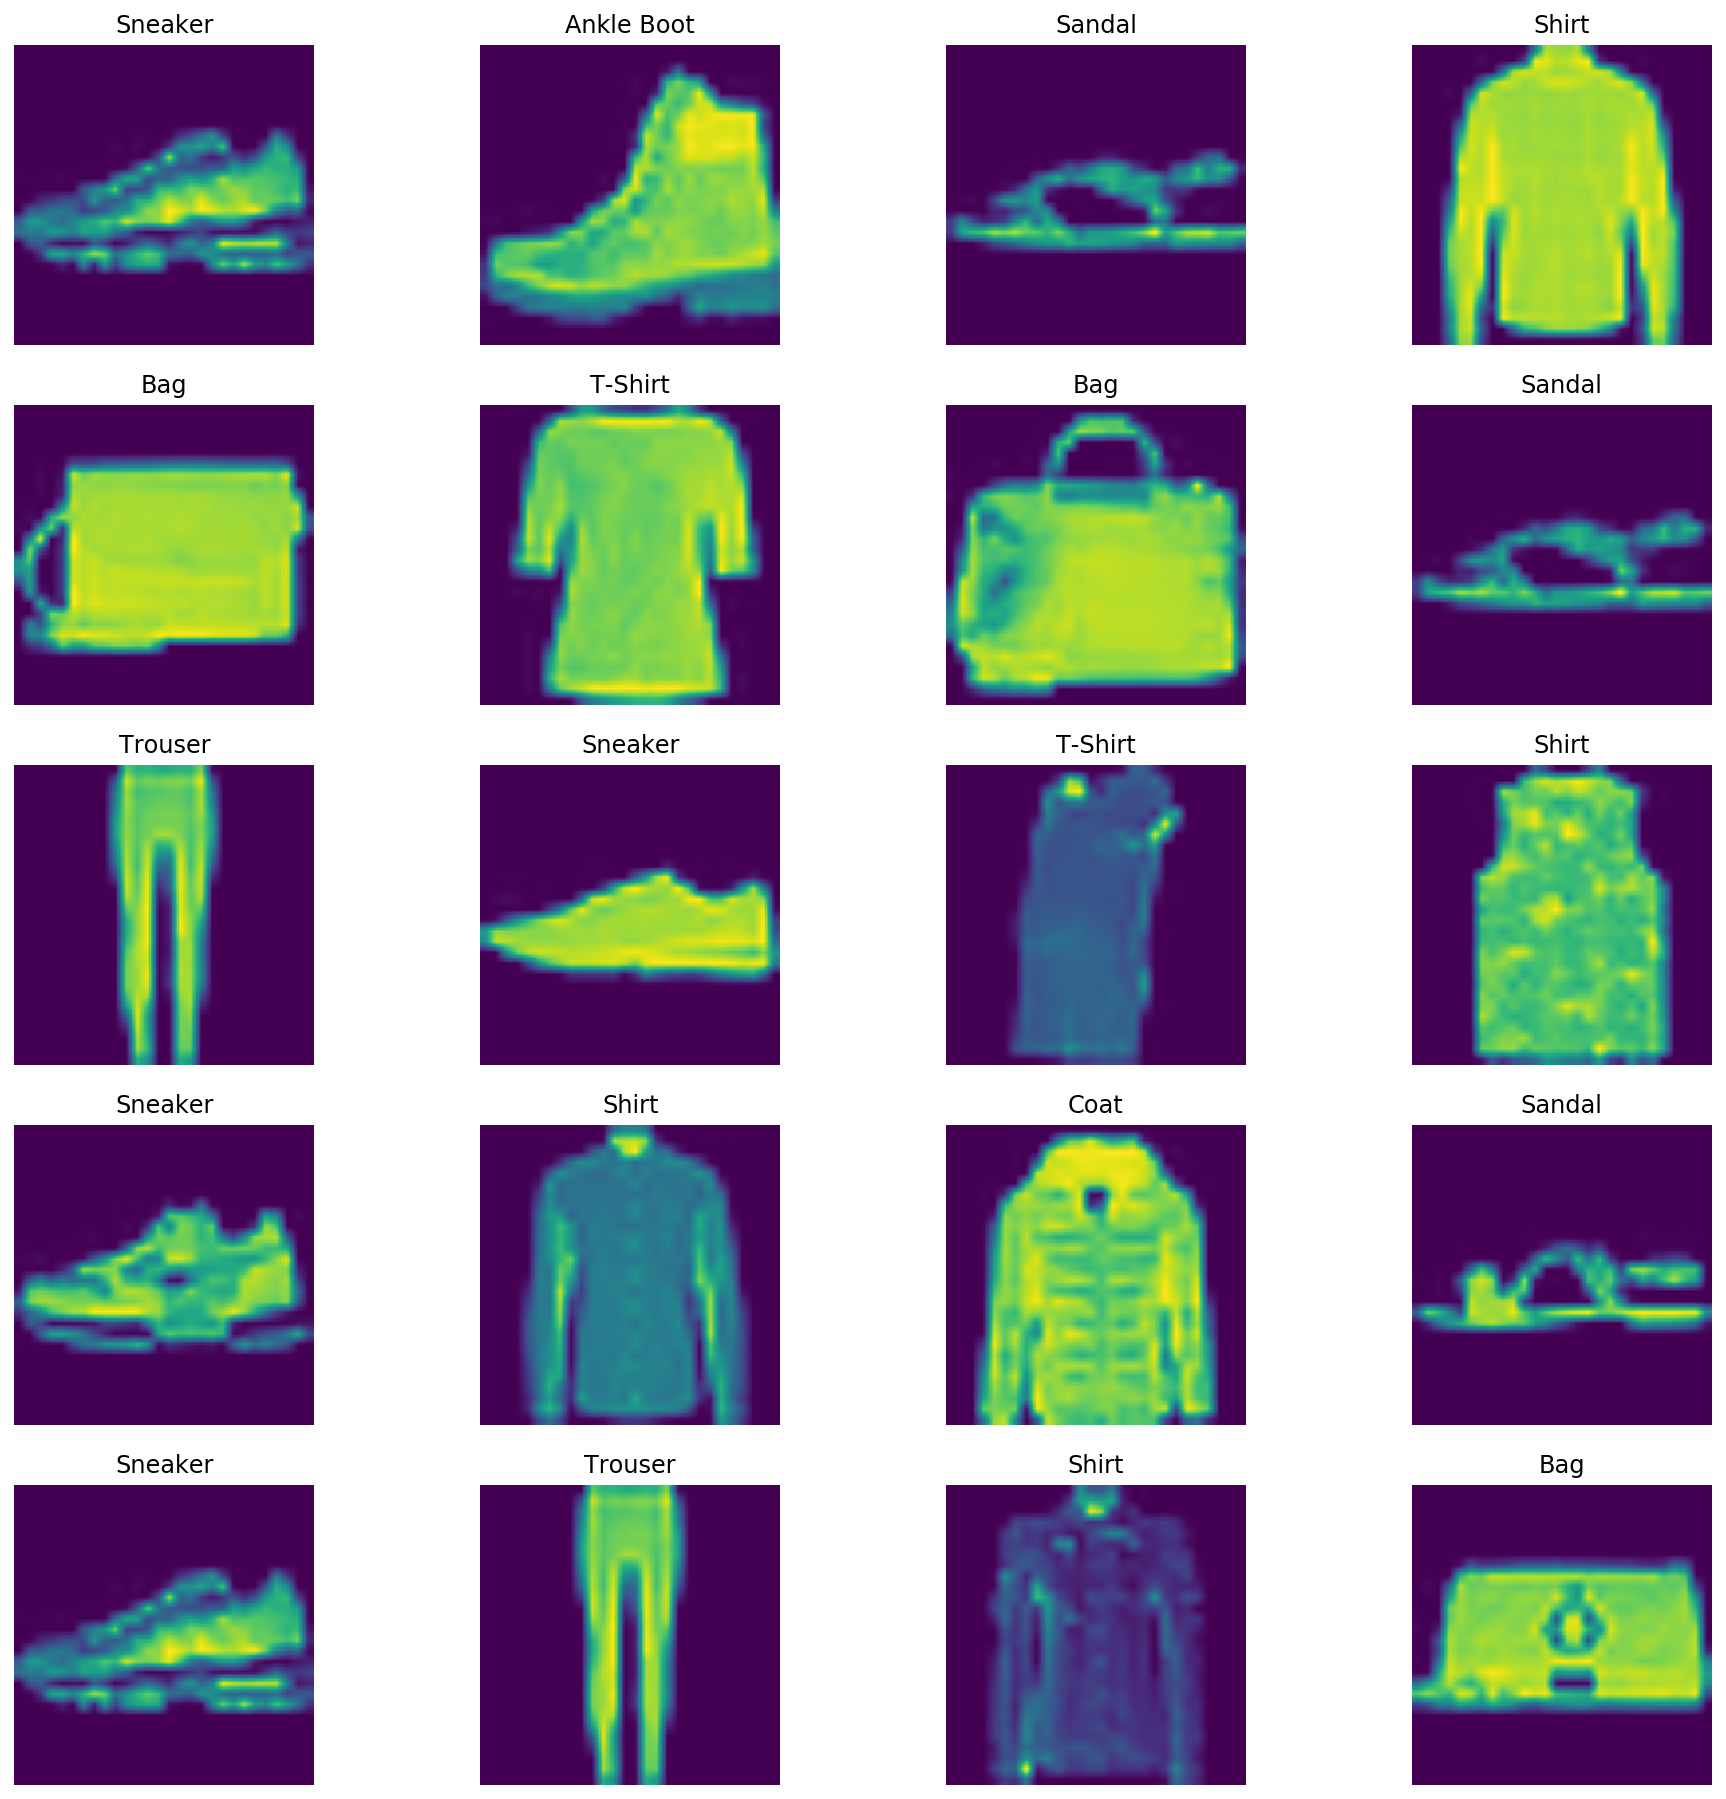

In [43]:
# Visualize Some sample data

# Obtaning first batch of training images, through iterator of DataLoader
dataiter = iter(trainloader)
images, labels = dataiter.next()

labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};

fig = plt.figure(figsize=(16,16));
columns = 4;
rows = 5;
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(images));
    img = images[img_xy][0]
    fig.add_subplot(rows, columns, i)
    plt.title(str(labels_map[int(labels[img_xy])]))
    plt.axis('off')
    plt.imshow(img)
plt.show()

## 2. Train dataset using VGG model

In [44]:
# Create model using VGG19 from torchvision models
model = models.vgg19(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /Users/fulviomascara/.cache/torch/checkpoints/vgg19-dcbb9e9d.pth
58.7%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


### VGG 19 Architecture

![VGG](VGG19.jpg)

In [45]:
# Show VGG19 Architecture
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU(inplace)

**Useful links that helped me build this notebook**

- https://www.arunprakash.org/2018/12/cnn-fashion-mnist-dataset-pytorch.html
- https://discuss.pytorch.org/t/understanding-transform-normalize/21730
- https://www.pyimagesearch.com/2019/02/11/fashion-mnist-with-keras-and-deep-learning/
- https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
- https://www.kaggle.com/carloalbertobarbano/vgg16-transfer-learning-pytorch
- https://medium.com/ml2vec/intro-to-pytorch-with-image-classification-on-a-fashion-clothes-dataset-e589682df0c5
- https://www.jianshu.com/p/34e2ef981f9e
- https://solvemprobler.com/blog/2017/09/29/range-of-convolutional-neural-networks-on-fashion-mnist-dataset/
- https://github.com/udacity/deep-learning-v2-pytorch/blob/master/transfer-learning/Transfer_Learning_Solution.ipynb
- https://medium.com/@josh_2774/deep-learning-with-pytorch-9574e74d17ad